In [1]:
import pandas as pd 
from datetime import datetime,date

In [2]:
#  create a function that compares a value to reference points of a list l and gives back the reference point that has the smallest difference between the value and the different reference points
def get_commune(cp,lg,lat,communes):
    #  check if cp is not nan
    if pd.isnull(cp):
        return None
    reference_values=communes[communes['code_postal']==int(cp)][['longitude','latitude','nom_commune_complet']]
    
    if reference_values.shape[0]==0:
        return None
    reference_values['distance']=((reference_values['longitude']-lg)**2+(reference_values['latitude']-lat)**2)**0.5
    if reference_values[reference_values['distance']==reference_values['distance'].min()].shape[0]>0:
        return reference_values[reference_values['distance']==reference_values['distance'].min()]['nom_commune_complet'].values[0]
    else:
        return None


In [3]:
bornes_missing_communes=pd.read_csv('./data_bornes/bornes.csv')
bornes_e55=pd.read_csv('./data_bornes/e55-bornes.csv')
bornes_cnr=pd.read_csv('./data_bornes/bornes_cnr.csv')
bornes_renault=pd.read_excel('./data_bornes/bornes-renault.xlsx')
communes=pd.read_csv('./data_bornes/communes-departement-region.csv')
bornes_tesla=pd.read_csv('./data_bornes/tesla-bornes.csv',encoding= 'ISO-8859-1',parse_dates=['date_maj'])
bornes_nissan=pd.read_excel('./data_bornes/bornes-nissan.xlsx')
bornes_auchan=pd.read_excel('./data_bornes/auchan_bornes.xlsx')
bornes_irve=pd.read_csv('./data_bornes/irve-bornes.csv')
bornes_ve=pd.read_excel('./data_bornes/VE-bornes.xlsx')
bornes_edenred=pd.read_excel('./data_bornes/ElectriCite.xlsx')


c:\Users\maram\anaconda3\envs\env\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
# extract from the column adresse_station the postal code start by 5 digits only if there is no 5 digits take the 4 digits 
bornes_missing_communes['code_postal_5']=bornes_missing_communes['adresse_station'].str.extract(r'(\d{5})',expand=False)
bornes_missing_communes['code_postal_4']=bornes_missing_communes['adresse_station'].str.extract(r'(\d{4})',expand=False)
# create a postal_code column that takes the values of postal_code_4 only if code_postal_5 is null
bornes_missing_communes['code_postal']=bornes_missing_communes['code_postal_5'].fillna(bornes_missing_communes['code_postal_4'])
#  cast code_postal column as int
bornes_missing_communes['code_postal']=bornes_missing_communes['code_postal'].astype(float)
# drop the columns code_postal_5 and code_postal_4
bornes_missing_communes.drop(['code_postal_5','code_postal_4'],axis=1,inplace=True)

# Edenred dataset

In [5]:
bornes_edenred.head()

,adresse_station,latitude_WSG84,longitude_WSG84,nom_porteur,nbre_pdc,date_maj
0,"40 Boulevard Noël Marc, 78570 Andrésy",48.978646,2.058029,ElectriCité Seine Aval,2,2023-01-19
1,"Avenue du Béarn, 78200 Buchelay",48.989610,1.664583,ElectriCité Seine Aval,2,2023-01-19
2,"24 Rue Jean Louis Scialloux, 78200 Buchelay",48.982390,1.677650,ElectriCité Seine Aval,2,2023-01-19
3,"20 Place de la Liberté, 78700 Conflans-Sainte-...",49.005144,2.116201,ElectriCité Seine Aval,2,2023-01-19
4,"128 Rue Charles de Gaulle, 78840 Freneuse",49.049036,1.601885,ElectriCité Seine Aval,2,2023-01-19


In [6]:
bornes_edenred['code_postal']=bornes_edenred['adresse_station'].str.extract(r'(\d{5})',expand=False)
bornes_edenred['date_maj']=pd.to_datetime(bornes_edenred['date_maj'])
bornes_edenred['year']=bornes_edenred['date_maj'].dt.year
bornes_edenred['month']=bornes_edenred['date_maj'].dt.month
bornes_edenred['commune']=bornes_edenred.apply(lambda x: get_commune(x['code_postal'],x['latitude_WSG84'],x['longitude_WSG84'],communes),axis=1)
data_edenred=bornes_edenred.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()


# Auchan dataset

In [7]:
bornes_auchan.head()

,N°,LIEU,ADRESSE,CP,Dept,Unnamed: 5,Latitude,Longitude,LIEN CHARGEMAP
0,1,AUCHAN,Chemin départemental 110,78200,78,BUCHELAY,48.983085,1.678852,http://fr.chargemap.com/points/details/auchan-...
1,2,AUCHAN,1449 Avenue de la République,26000,26,GUILHERAND - GRANGES,44.936360,4.872980,http://fr.chargemap.com/points/details/auchan-...
2,3,AUCHAN,ZAC du mont Gaillard (Centre Commercial Grand ...,76620,76,LE HAVRE,49.525400,0.112158,http://fr.chargemap.com/points/details/auchan-...
3,4,AUCHAN,1 à 9 avenue du maréchal Foch - RN34,93330,93,NEUILLY/MARNE,48.856898,2.528373,http://fr.chargemap.com/points/details/auchan-...
4,5,AUCHAN,Auchan Côte d'Opale Rte Nationale 42,62200,62,ST MARTIN BOULOGNE,50.733350,1.670628,http://fr.chargemap.com/points/details/auchan-...


In [8]:
bornes_auchan['commune']=bornes_auchan.apply(lambda x: get_commune(x['CP'],x['Longitude'],x['Latitude'],communes),axis=1)
bornes_auchan['year']=2016
bornes_auchan['month']=2
bornes_auchan['nbre_pdc']=1
data_auchan=bornes_auchan.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()


# Ve dataset


In [9]:
bornes_ve.head()


,adresse_station,latitude_WSG84,longitude_WSG84,nbre_pdc,date_maj
0,A9 - MONTBLANC 34290,43.361123,3.344201,1,2016-04-29
1,A9 - MONTBLANC 34290,43.359030,3.347042,1,2016-04-29
2,A13 - BOSGOUET 27310,49.361030,0.864317,1,2016-04-29
3,A31 - BROGNON 21490,47.422962,5.168843,1,2016-04-29
4,A31 - BROGNON 21490,47.422787,5.170416,1,2016-04-29


In [10]:
bornes_ve['code_postal']=bornes_ve['adresse_station'].str.extract(r'(\d{5})',expand=False)
bornes_ve['date_maj']=pd.to_datetime(bornes_ve['date_maj'])
bornes_ve['year']=bornes_ve['date_maj'].dt.year
bornes_ve['month']=bornes_ve['date_maj'].dt.month
bornes_ve['commune']=bornes_ve.apply(lambda x: get_commune(x['code_postal'],x['latitude_WSG84'],x['longitude_WSG84'],communes),axis=1)
data_ve=bornes_ve.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()


# Ivre dataset

In [11]:
bornes_irve.head()


,nom_station,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,date_mise_en_service,date_maj
0,Les Aix d Angillon,Route de Bourges - 18220 LE AIX D ANGILLON,18003.0,"[47.1950266,2.5656172]",1.0,02/07/2017,1/27/2022
1,Les Aix d Angillon,Route de Bourges - 18220 LE AIX D ANGILLON,18003.0,"[47.1950266,2.5656172]",1.0,02/07/2017,1/27/2022
2,Allogny,Rue de l Abreuvoir - 18110 ALLOGNY,18004.0,"[47.2257841,2.3184789]",1.0,5/27/2016,1/27/2022
3,Allogny,Rue de l Abreuvoir - 18110 ALLOGNY,18004.0,"[47.2257841,2.3184789]",1.0,5/27/2016,1/27/2022
4,Apremont sur Allier,Parking route de Germigny - 18150 APREMONT SUR...,18007.0,"[46.9075846,3.0463252]",1.0,9/17/2018,1/27/2022


In [12]:
bornes_irve.code_insee_commune=bornes_irve.code_insee_commune.apply(lambda row:str(int(float(row))) if not pd.isnull(row) else '')
bornes_irve=bornes_irve.merge(communes[['code_commune_INSEE','nom_commune_complet']],left_on='code_insee_commune',right_on='code_commune_INSEE',how='left')
bornes_irve['date_maj']=pd.to_datetime(bornes_irve['date_maj'])

bornes_irve['date_mise_en_service']=pd.to_datetime(bornes_irve['date_mise_en_service'])
bornes_irve['date_mise_en_service'].fillna(bornes_irve['date_maj'],inplace=True)


bornes_irve['year']=bornes_irve['date_mise_en_service'].dt.year
bornes_irve['month']=bornes_irve['date_mise_en_service'].dt.month


In [13]:
bornes_irve.rename(columns={'nom_commune_complet':'commune'},inplace=True)
data_ivre=bornes_irve.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()

# Tesla dataset

In [14]:
# tesla dataset
bornes_tesla['code_postal']=bornes_tesla['adresse_station'].str.extract(r'(\d{5})',expand=False)
bornes_tesla['commune']=bornes_tesla.apply(lambda x: get_commune(x['code_postal'],x['longitude_WGS84'],x['latitude_WGS84'],communes),axis=1)
# convert date_maj date string format day whole month year to datetime
bornes_tesla['date_maj']= datetime(2017, 9, 17)
bornes_tesla['year']=bornes_tesla['date_maj'].dt.year
bornes_tesla['month']=bornes_tesla['date_maj'].dt.month
bornes_tesla['trimestre']=bornes_tesla['date_maj'].dt.to_period('Q')
bornes_tesla.rename(columns={'longitude_WGS84':'longitude','latitude_WGS84':'latitude'},inplace=True)
data_tesla=bornes_tesla.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()
bornes_tesla.head()

,adresse_station,latitude,longitude,nbre_pdc,date_maj,code_postal,commune,year,month,trimestre
0,Mercure Auxerre Nord - Route nationale 6 - Lie...,47.851830,3.542802,8,2017-09-17,89380,Appoigny,2017,9,2017Q3
1,1 Boulevard du Général de Gaulle - 71000 Sancé,46.346553,4.850173,10,2017-09-17,71000,Sancé,2017,9,2017Q3
2,8 Route Nationale - 51510 Matougues,48.991919,4.245022,4,2017-09-17,51510,Matougues,2017,9,2017Q3
3,1097 Avenue Des Landiers - 73000 Chambéry,45.592227,5.899842,4,2017-09-17,73000,Chambéry,2017,9,2017Q3
4,130 Rue de LHôtellerie - 11100 Narbonne,43.167686,2.986016,8,2017-09-17,11100,Narbonne,2017,9,2017Q3


# E55 Dataset

In [15]:
bornes_e55.head()

,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,gratuit,date_mise_en_service,date_maj
0,PARKING MEDIATHEQUE CAVALAIRE SUR MER,83240,"43.170946, 6.534893",1,False,07/06/2021,07/06/2021
1,PARKING MEDIATHEQUE CAVALAIRE SUR MER,83240,"43.170946, 6.534893",1,False,07/06/2021,07/06/2021
2,PARKING PORT ST TROPEZ,83990,"43.270440, 6.635375",1,False,07/06/2021,07/06/2021
3,PARKING PORT ST TROPEZ,83990,"43.270440, 6.635375",1,False,07/06/2021,07/06/2021
4,ZONE COMMERCIAL PUGET SUR ARGENS,83480,"43.443935, 6.706553",1,False,07/06/2021,07/06/2021


In [16]:
# split the coordonneesXY into longitude and latitude
bornes_e55['latitude']=bornes_e55['coordonneesXY'].str.split(',').str[0].astype(float)
bornes_e55['longitude']=bornes_e55['coordonneesXY'].str.split(',').str[1].astype(float)
bornes_e55['code_postal']=bornes_e55['code_insee_commune'].str.extract(r'(\d{5})',expand=False)
bornes_e55['date_mise_en_service']=pd.to_datetime(bornes_e55['date_mise_en_service'])
bornes_e55['year']=bornes_e55['date_mise_en_service'].dt.year
bornes_e55['month']=bornes_e55['date_mise_en_service'].dt.month
bornes_e55['commune']=bornes_e55.apply(lambda x: get_commune(x['code_postal'],x['longitude'],x['latitude'],communes),axis=1)

data_e55=bornes_e55.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()


C:\Users\maram\AppData\Local\Temp\ipykernel_37796\860205293.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bornes_e55['date_mise_en_service']=pd.to_datetime(bornes_e55['date_mise_en_service'])


In [17]:
data_e55.head()

,year,month,commune,nbre_pdc
0,2021,7,Avignon,58
1,2021,7,Bruay-la-Buissière,4
2,2021,7,Cavalaire-sur-Mer,4
3,2021,7,Clamart,24
4,2021,7,Cogolin,4


# CNR dataset

In [18]:
bornes_cnr.head()


,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,date_mise_en_service,date_maj
0,Impasse de Provence 84420 Piolenc,84091,"[4.76131, 44.1734]",2,31/01/2017,02/02/2022
1,Impasse de Provence 84420 Piolenc,84091,"[4.76131, 44.1734]",2,31/01/2017,02/02/2022
2,Avenue de l'Europe 69140 Rillieux-la-Pape,69286,"[4.90853, 45.8192]",2,07/02/2017,02/02/2022
3,Avenue de l'Europe 69140 Rillieux-la-Pape,69286,"[4.90853, 45.8192]",2,07/02/2017,01/02/2022
4,1130 Promenade Léon Perrier 84500 Bollène,84019,"[4.74008, 44.304]",2,22/03/2017,02/02/2022


In [19]:
# convert column to float
bornes_cnr['code_insee_commune']=bornes_cnr['code_insee_commune'].astype(str)
bornes_cnr=bornes_cnr.merge(communes[['code_commune_INSEE','nom_commune']],left_on='code_insee_commune',right_on='code_commune_INSEE',how='left')
bornes_cnr.drop(['code_commune_INSEE'],axis=1,inplace=True)
bornes_cnr.rename(columns={'nom_commune':'commune'},inplace=True)
bornes_cnr['date_mise_en_service']=pd.to_datetime(bornes_cnr['date_mise_en_service'])
bornes_cnr['year']=bornes_cnr['date_mise_en_service'].dt.year
bornes_cnr['month']=bornes_cnr['date_mise_en_service'].dt.month


C:\Users\maram\AppData\Local\Temp\ipykernel_37796\656454529.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bornes_cnr['date_mise_en_service']=pd.to_datetime(bornes_cnr['date_mise_en_service'])


In [20]:
bornes_cnr['latitude']=bornes_cnr['coordonneesXY'].str.split(',').str[0]
bornes_cnr['longitude']=bornes_cnr['coordonneesXY'].str.split(',').str[1]
bornes_cnr['longitude']=bornes_cnr['longitude'].apply(lambda x: x.strip().replace(']',''))
bornes_cnr['latitude']=bornes_cnr['latitude'].apply(lambda x: x.strip().replace('[',''))
data_cnr=bornes_cnr.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()
data_cnr.head()

,year,month,commune,nbre_pdc
0,2017,1,Piolenc,4
1,2017,2,Lyon 02,9
2,2017,3,Arles,14
3,2017,3,Bollène,4
4,2017,4,Bellegarde-sur-Valserine,2


# Renault Dataset


In [21]:
bornes_renault.head()

,nom_station,longitude_WSG84,latitude_WSG84,nbre_pdc
0,ETABLISSEMENT RENAULT DE BOURG-EN-BRESSE,46.212732,5.218786,1
1,ETABLISSEMENT RENAULT DE CESSY,46.305656,6.066023,1
2,ETABLISSEMENT RENAULT DE BELLEGARDE-SUR-VALSERINE,46.119135,5.810467,1
3,ETABLISSEMENT RENAULT DE LAON,49.583957,3.647164,1
4,ETABLISSEMENT RENAULT DE SAINT-QUENTIN,49.850773,3.262393,1


In [22]:
import numpy as np
# get the dataframe in with we find name in the column nom_commune_complet
communes.nom_commune_postal=communes.nom_commune_postal.str.lower()
communes.nom_commune_complet=communes.nom_commune_complet.str.lower()
def find_commune_in_dataframe(ch,communes):
    ch=ch.lower()

    r=communes[communes['nom_commune_complet'].str.contains(ch)]
    if len(r)>0:
        return r['nom_commune_complet'].values[0]
    else:
        
        r=communes[communes['nom_commune_postal'].str.contains(ch.replace('-',' '))]
        if len(r)>0:
            return r['nom_commune_complet'].values[0]
        else:
            if 'saint' in ch.lower():
                return find_commune_in_dataframe(ch.replace('saint','st'),communes)
            else:
                return np.nan

In [23]:
bornes_renault['commune_nom']=bornes_renault['nom_station'].str.split(' ').str[-1]
bornes_renault['commune']=bornes_renault['commune_nom'].apply(lambda row: find_commune_in_dataframe(row,communes))
bornes_renault['year']=2022
bornes_renault['month']=1
bornes_renault.rename(columns={'longitude_WSG84':'longitude','latitude_WSG84':'latitude'},inplace=True)



In [24]:
data_renault=bornes_renault.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()
data_renault.head()

,year,month,commune,nbre_pdc
0,2022,1,abbeville-saint-lucien,1
1,2022,1,abrest,1
2,2022,1,agen-d'aveyron,1
3,2022,1,agnicourt-et-séchelles,1
4,2022,1,aire-sur-l'adour,1


# Nissan Dataset

In [25]:
bornes_nissan.head()

,LIEU,CP,Latitude,Longitude,LIEN CHARGEMAP,nbre_pdc
0,Concession NISSAN,6000,43.703299,7.256004,http://fr.chargemap.com/points/details/nissan-...,1
1,Concession NISSAN,13016,43.360022,5.339142,http://fr.chargemap.com/points/details/nissan-...,1
2,Concession NISSAN,13090,43.528462,5.431113,http://fr.chargemap.com/points/details/nissan-...,1
3,Concession NISSAN,17690,46.103866,-1.110261,http://fr.chargemap.com/points/details/nissan-...,1
4,Concession NISSAN,28630,48.420661,1.444959,http://fr.chargemap.com/points/details/nissan-lga,1


In [26]:
bornes_nissan['commune']=bornes_nissan.apply(lambda x: get_commune(x['CP'],x['Longitude'],x['Latitude'],communes),axis=1)
bornes_nissan['year']=2015
bornes_nissan['month']=1
data_nissan=bornes_nissan.groupby(['month','year','commune'])['nbre_pdc'].sum().reset_index()
data_nissan.columns=data_nissan.columns.str.lower()
data_nissan.head()


,month,year,commune,nbre_pdc
0,1,2015,aix-en-provence,1
1,1,2015,amiens,1
2,1,2015,angoulins,1
3,1,2015,avignon,1
4,1,2015,besançon,1


#  Etalab dataset 

In [27]:
no_commune = bornes_missing_communes[bornes_missing_communes['consolidated_commune'].isnull()]
with_commune = bornes_missing_communes[bornes_missing_communes['consolidated_commune'].notnull()]

In [28]:
no_commune['commune']=no_commune.apply(lambda x: get_commune(x['code_postal'],x['consolidated_longitude'],x['consolidated_latitude'],communes),axis=1)

C:\Users\maram\AppData\Local\Temp\ipykernel_37796\2017973935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_commune['commune']=no_commune.apply(lambda x: get_commune(x['code_postal'],x['consolidated_longitude'],x['consolidated_latitude'],communes),axis=1)


In [29]:
no_commune=no_commune.merge(communes[['code_commune_INSEE','nom_commune']], left_on='code_insee_commune', right_on='code_commune_INSEE', how='left')
no_commune['consolidated_commune']=no_commune['nom_commune'].fillna(no_commune['commune'])
# get the final dataset by concatenating the two datasets
no_commune.drop(['code_commune_INSEE','nom_commune','commune'],axis=1,inplace=True)


In [30]:
bornes=pd.concat([with_commune,no_commune],axis=0)
bornes['latitude']=bornes['coordonneesXY'].str.split(',').str[0]
bornes['longitude']=bornes['coordonneesXY'].str.split(',').str[1]
bornes['longitude']=bornes['longitude'].apply(lambda x: x.strip().replace(']',''))
bornes['latitude']=bornes['latitude'].apply(lambda x: x.strip().replace('[',''))

In [31]:
#  convert columns date_mise_en_service	date_maj	last_modified to date
bornes['date_mise_en_service']=pd.to_datetime(bornes['date_mise_en_service'])
bornes['date_maj']=pd.to_datetime(bornes['date_maj'])
bornes['last_modified']=pd.to_datetime(bornes['last_modified'])
# imputation of date_mise_en_service using the max date_mise_en_service of the corresponding implantation_station
bornes['date_mise_en_service']=bornes.groupby('implantation_station')['date_mise_en_service'].transform(lambda x: x.fillna(x.max()))
# create a column that sets  date_mise_en_service inferior to 2014-01-01 to 2014-01-01
bornes['date_mise_en_service_2014']=bornes['date_mise_en_service'].apply(lambda x: x if x>pd.to_datetime('2014-01-01') else pd.to_datetime('2014-01-01'))
# get only the date from the column last_modified
bornes['year']=bornes['last_modified'].dt.year
bornes['month']=bornes['last_modified'].dt.month
bornes.rename(columns={'consolidated_commune':'commune'},inplace=True)

data_etalab=bornes.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()



C:\Users\maram\AppData\Local\Temp\ipykernel_37796\1014021659.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bornes['date_mise_en_service']=pd.to_datetime(bornes['date_mise_en_service'])
C:\Users\maram\AppData\Local\Temp\ipykernel_37796\1014021659.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bornes['date_maj']=pd.to_datetime(bornes['date_maj'])


In [32]:
data_etalab.head()

,year,month,commune,nbre_pdc
0,2023,1,Abbaretz,4
1,2023,1,Abeilhan,8
2,2023,1,Abzac,8
3,2023,1,Achicourt,8
4,2023,1,Achères,20


# Final Dataset

In [33]:
# concat the data from the six datasets
data=pd.concat([data_etalab,data_renault,data_nissan,data_cnr,data_tesla,data_e55,bornes_edenred,bornes_auchan,bornes_ve,bornes_irve],axis=0)
data=data.groupby(['year','month','commune'])['nbre_pdc'].sum().reset_index()
# calculate the cumulative sum of nbre_pdc by commune
data['cumsum']=data.groupby('commune')['nbre_pdc'].cumsum()
data=data.groupby(['year','commune'])['nbre_pdc'].sum().reset_index()
# add the missing year values for each commune and fill with the value of the previous year
year_list=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
for year in year_list:
    for commune in data['commune'].unique():
        if len(data[(data['year']==year)& (data['commune']==commune)])==0 :
            # adda a row to dataset
            data=pd.concat([data,pd.DataFrame({'year':year,'commune':commune,'nbre_pdc':np.nan},index=[0])])



In [34]:
data.nbre_pdc.fillna(0,inplace=True)
data['total_bornes']=data.groupby('commune')['nbre_pdc'].cumsum()


In [41]:
data.to_csv('bornes_par_commune_par_année.csv',index=False)

# Get the cluster

Visualize the distribution of the "bornes de recharge" per cluster per year

In [63]:
df_cluster=pd.read_csv('./Cluster/data_commune_cluster.csv')
df_cluster=df_cluster[['libgeo','cluster']]
df_cluster.rename(columns={'libgeo':'commune'},inplace=True)
df_cluster.commune=df_cluster.commune.str.lower()

df_cluster.head()

,commune,cluster
0,l'abergement-clémenciat,3
1,l'abergement-de-varey,6
2,ambérieu-en-bugey,35
3,ambérieux-en-dombes,3
4,ambléon,3


In [64]:
data.commune=data.commune.str.lower()
bornes_cluster=data.merge(df_cluster,on='commune',how='left')
bornes_cluster.head()

,year,commune,nbre_pdc,total_bornes,cluster
0,2015,boulleret,2.0,2.0,1.0
1,2015,chezal-benoît,2.0,2.0,1.0
2,2015,méreau,2.0,2.0,1.0
3,2015,neuvy-sur-barangeon,2.0,2.0,1.0
4,2015,aix-en-provence,1.0,1.0,16.0


In [65]:
other_comm=bornes_missing_communes[['consolidated_latitude','consolidated_longitude','consolidated_commune','nbre_pdc']].groupby(['consolidated_latitude','consolidated_longitude','consolidated_commune'])['nbre_pdc'].sum().reset_index()
other_comm.consolidated_commune=other_comm.consolidated_commune.str.lower()

In [66]:
commune_=communes[['nom_commune_complet','latitude','longitude']].groupby('nom_commune_complet').agg({'latitude':'mean','longitude':'mean'}).reset_index()
commune_['nom_commune_modified']=commune_.nom_commune_complet.apply(lambda row: row.split(' ')[1] if len(row.split(' '))>1 else row)
bornes_cluster_=bornes_cluster.merge(commune_,left_on='commune',right_on='nom_commune_complet',how='left')

In [67]:
bornes_cluster_.head()

,year,commune,nbre_pdc,total_bornes,cluster,nom_commune_complet,latitude,longitude,nom_commune_modified
0,2015,boulleret,2.0,2.0,1.0,boulleret,47.432226,2.884901,boulleret
1,2015,chezal-benoît,2.0,2.0,1.0,chezal-benoît,46.831767,2.111170,chezal-benoît
2,2015,méreau,2.0,2.0,1.0,méreau,47.179417,2.052202,méreau
3,2015,neuvy-sur-barangeon,2.0,2.0,1.0,neuvy-sur-barangeon,47.322013,2.271367,neuvy-sur-barangeon
4,2015,aix-en-provence,1.0,1.0,16.0,aix-en-provence,43.536071,5.398574,aix-en-provence


In [68]:
other_comm_=other_comm[other_comm.consolidated_commune.isin( list(bornes_cluster_[bornes_cluster_['latitude'].isnull()].commune.unique())) ].groupby(['consolidated_commune']).agg({'consolidated_longitude':'mean','consolidated_latitude':'mean'}).reset_index()
bornes_cluster_=bornes_cluster_.merge(other_comm_,left_on='commune',right_on='consolidated_commune',how='left')
bornes_cluster_.latitude.fillna(bornes_cluster_.consolidated_latitude,inplace=True)
bornes_cluster_.longitude.fillna(bornes_cluster_.consolidated_longitude,inplace=True)
bornes_cluster=bornes_cluster_[['year', 'commune', 'total_bornes', 'cluster', 'latitude', 'longitude']]

In [69]:
bornes_cluster1=bornes_cluster.copy()
bornes_cluster1=bornes_cluster1.merge(commune_,left_on='commune',right_on='nom_commune_modified',how='left')
bornes_cluster1.latitude_x.fillna(bornes_cluster1.latitude_y,inplace=True)
bornes_cluster1.longitude_x.fillna(bornes_cluster1.longitude_y,inplace=True)
bornes_cluster1=bornes_cluster1[['year', 'commune', 'total_bornes', 'cluster', 'latitude_x', 'longitude_x']]
bornes_cluster1.rename(columns={'latitude_x':'latitude','longitude_x':'longitude'},inplace=True)
bornes_cluster1.isnull().sum()


year               0
commune            0
total_bornes       0
cluster         1470
latitude          20
longitude         20
dtype: int64

In [70]:
import matplotlib.pyplot as plt

In [ ]:
# plot france map using pygal
import pygal
import pygal_maps_fr
from pygal.style import Style
custom_style = Style(
    background='transparent',
    plot_background='transparent',
    foreground='#53E89B',
    foreground_strong='#53A0E8',
    foreground_subtle='#630C0D',
    opacity='.6',
    opacity_hover='.9',
    transition='400ms ease-in',
    colors=('#E853A0', '#E9537D', '#E87653', '#E89B53'))
# create a map
france_map = pygal.maps.fr.Departments(style=custom_style)


In [ ]:
# drop the missing values of latitude and longitude
bornes_cluster1.dropna(subset=['latitude','longitude'],inplace=True)

In [ ]:
bornes_cluster1.isnull().sum()

year            0
commune         0
cumsum          0
cluster      1390
latitude        0
longitude       0
dtype: int64

In [ ]:
bornes_cluster1_nocluster=bornes_cluster1[~bornes_cluster1.cluster.isnull()]

In [ ]:
# print cumsum on france map using longitude and latitude
for i in range(len(bornes_cluster1_nocluster)):
    france_map.add(bornes_cluster1_nocluster.iloc[i]['commune'],[(bornes_cluster1_nocluster.iloc[i]['longitude'],bornes_cluster1_nocluster.iloc[i]['latitude'])])
# save the map


In [72]:
data[data.year==2023]['total_bornes'].sum()

600637.0

In [78]:
bornes_2023=bornes_cluster1[(bornes_cluster1.latitude>35) & (bornes_cluster1.longitude.between(-10,10)) & (bornes_cluster1.year==2023)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Répartition des bornes de recharge par clusters des communes en 2023')

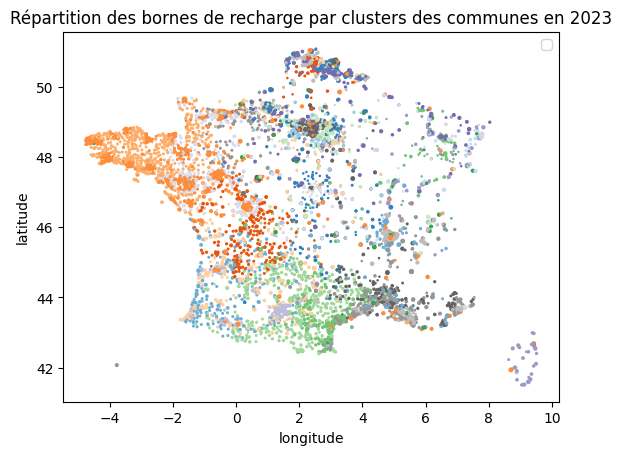

In [81]:
plt.scatter(bornes_2023['longitude'],bornes_2023['latitude'],c=bornes_2023['cluster'],s=np.log(a['total_bornes']), cmap = 'tab20c')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.title('Répartition des bornes de recharge par clusters des communes en 2023')